In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
%matplotlib inline

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [4]:
variables=['Genre', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
features=['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df=df[variables]

In [5]:
df.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.36,28.96,3.77,8.45,82.53
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.68,12.76,3.79,3.29,35.52
3,Sports,15.61,10.93,3.28,2.95,32.77
4,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.000000,1.000000,0.368885,0.799432,1.000000
1,0.703095,0.123619,0.666341,0.072848,0.487518
2,0.379110,0.440608,0.370841,0.311258,0.430320
3,0.377418,0.377417,0.320939,0.279092,0.396995
4,0.272485,0.306975,1.000000,0.094607,0.380029


In [7]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,96.264056,0.151706,7.743045,-0.387910,-0.000704
1,48.065059,9.795785,-7.593673,-0.882314,0.001753
2,40.431400,-2.554908,1.925047,-0.478348,0.001378
3,37.506735,-1.010630,1.346555,-0.340926,0.001305
4,34.477266,-5.860180,-5.209658,-1.456066,-0.003689


In [13]:
explained_variance = pca.explained_variance_ratio_.cumsum()
explained_variance

array([0.94411775, 0.97365408, 0.99510903, 0.99999842, 1.        ])

In [9]:
df_pca['Genre'] = df['Genre']
df_pca.columns = ['PC1', 'PC2','PC3','PC4', 'PC5','Genre']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,Genre
0,96.264056,0.151706,7.743045,-0.387910,-0.000704,Sports
1,48.065059,9.795785,-7.593673,-0.882314,0.001753,Platform
2,40.431400,-2.554908,1.925047,-0.478348,0.001378,Racing
3,37.506735,-1.010630,1.346555,-0.340926,0.001305,Sports
4,34.477266,-5.860180,-5.209658,-1.456066,-0.003689,Role-Playing


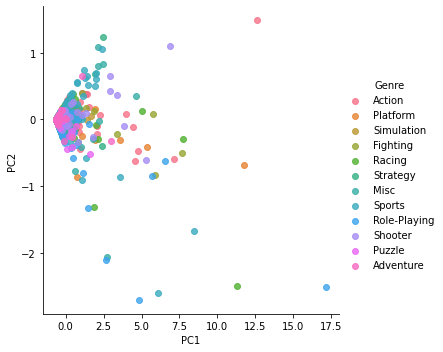

In [15]:
sns.lmplot(data=df_pca.sample(frac=0.05),x='PC1',y='PC2',hue='Genre',fit_reg=False)